Benchmarking Paillier (Key Size: 2048, Iterations: 100)...
Key Generation Time: 0.0238s
Benchmarking ElGamal (Key Size: 2048, Iterations: 100)...
Key Generation Time: 0.0543s


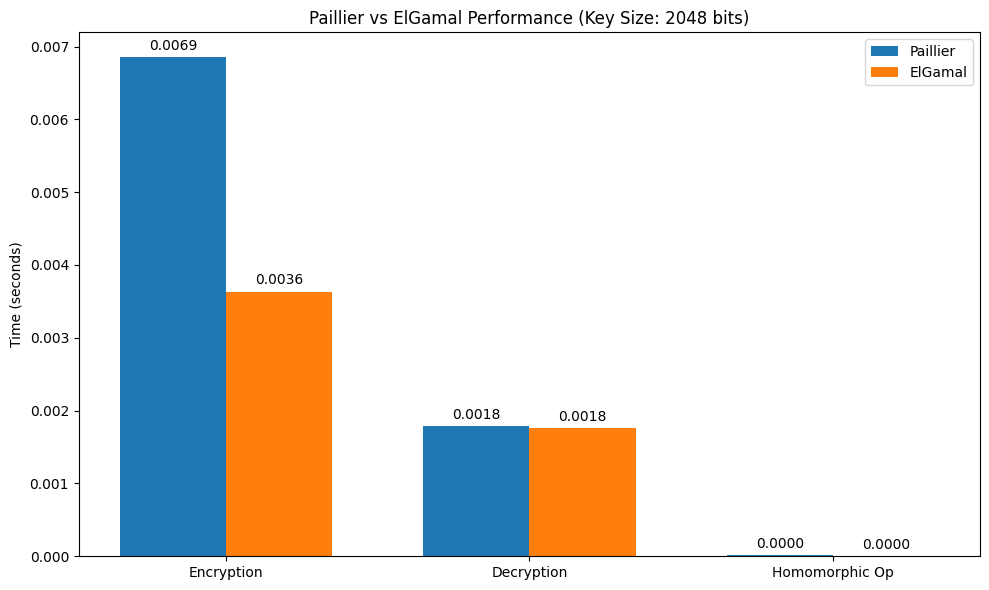

In [2]:
import sys
import os
import time
import numpy as np
import matplotlib.pyplot as plt

# Add src to path
sys.path.append(os.path.abspath('../src'))

from he_toolkit.schemes.partial.paillier import PaillierScheme
from he_toolkit.schemes.partial.elgamal import ElGamalScheme

# Benchmark Parameters
KEY_SIZE = 2048
ITERATIONS = 100

def benchmark_paillier(iterations=100, key_size=2048):
    print(f"Benchmarking Paillier (Key Size: {key_size}, Iterations: {iterations})...")
    scheme = PaillierScheme()
    
    # Key Generation
    start = time.time()
    pk, sk = scheme.generate_keys(key_size)
    keygen_time = time.time() - start
    print(f"Key Generation Time: {keygen_time:.4f}s")
    
    # Encryption
    enc_times = []
    plaintexts = [np.random.randint(1, 1000) for _ in range(iterations)]
    ciphertexts = []
    for m in plaintexts:
        start = time.time()
        c = scheme.encrypt(float(m), pk)
        enc_times.append(time.time() - start)
        ciphertexts.append(c)
    avg_enc_time = np.mean(enc_times)
    
    # Decryption
    dec_times = []
    for c in ciphertexts:
        start = time.time()
        _ = scheme.decrypt(c, sk)
        dec_times.append(time.time() - start)
    avg_dec_time = np.mean(dec_times)
    
    # Homomorphic Addition
    add_times = []
    for i in range(0, len(ciphertexts)-1, 2):
        c1 = ciphertexts[i]
        c2 = ciphertexts[i+1]
        start = time.time()
        _ = scheme.add(c1, c2)
        add_times.append(time.time() - start)
    avg_op_time = np.mean(add_times)
    
    return avg_enc_time, avg_dec_time, avg_op_time

def benchmark_elgamal(iterations=100, key_size=2048):
    print(f"Benchmarking ElGamal (Key Size: {key_size}, Iterations: {iterations})...")
    scheme = ElGamalScheme()
    
    # Key Generation
    start = time.time()
    pk, sk = scheme.generate_keys(key_size)
    keygen_time = time.time() - start
    print(f"Key Generation Time: {keygen_time:.4f}s")
    
    # Encryption
    enc_times = []
    plaintexts = [np.random.randint(1, 1000) for _ in range(iterations)]
    ciphertexts = []
    for m in plaintexts:
        start = time.time()
        c = scheme.encrypt(float(m), pk)
        enc_times.append(time.time() - start)
        ciphertexts.append(c)
    avg_enc_time = np.mean(enc_times)
    
    # Decryption
    dec_times = []
    for c in ciphertexts:
        start = time.time()
        _ = scheme.decrypt(c, sk)
        dec_times.append(time.time() - start)
    avg_dec_time = np.mean(dec_times)
    
    # Homomorphic Multiplication
    mult_times = []
    for i in range(0, len(ciphertexts)-1, 2):
        c1 = ciphertexts[i]
        c2 = ciphertexts[i+1]
        start = time.time()
        _ = scheme.multiply(c1, c2)
        mult_times.append(time.time() - start)
    avg_op_time = np.mean(mult_times)
    
    return avg_enc_time, avg_dec_time, avg_op_time

# Run Benchmarks
paillier_res = benchmark_paillier(ITERATIONS, KEY_SIZE)
elgamal_res = benchmark_elgamal(ITERATIONS, KEY_SIZE)

# Plotting
labels = ['Encryption', 'Decryption', 'Homomorphic Op']
paillier_times = [paillier_res[0], paillier_res[1], paillier_res[2]]
elgamal_times = [elgamal_res[0], elgamal_res[1], elgamal_res[2]]

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, paillier_times, width, label='Paillier')
rects2 = ax.bar(x + width/2, elgamal_times, width, label='ElGamal')

ax.set_ylabel('Time (seconds)')
ax.set_title(f'Paillier vs ElGamal Performance (Key Size: {KEY_SIZE} bits)')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Add labels on top of bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.4f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.show()